# Burgers' Equation

Here we solve the Burgers' equation $\frac{d u}{d t} + u \frac{d u}{d x}=0$ using as an initial condition a gaussian profile $u(x,t=0)=10 * \exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.


### Flux conservative form:
$\frac{d u}{d t} + a \frac{d f(u)}{d x}=0$

with 

$f(u) = \frac{1}{2} u^2$

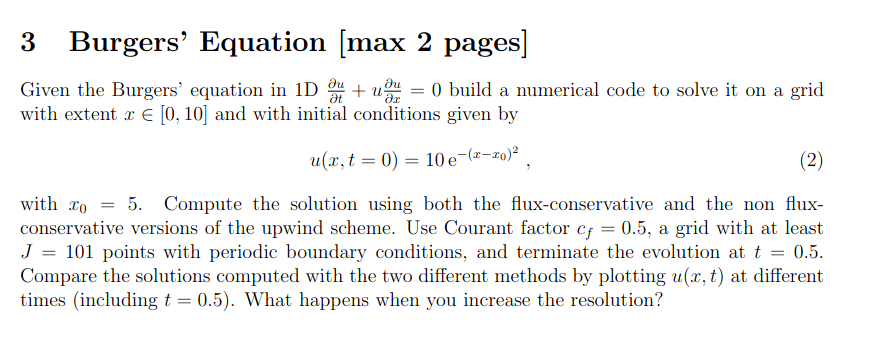

In [1]:
#import sys
#!{sys.executable} -m pip install imageio[ffmpeg]

In [66]:
import numpy as np

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the initial condition
x0=5
u_initial = 10 * np.exp(-(x-x0)**2)
# Define the time step and the final time
cf = 0.5
dt = cf*dx/np.max(u_initial)   # Time step ---> cf * dt / (max of velocity) -----> max of u_initial 
t_final = 0.5

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)


# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.005
Number of iterations= 100.0


In [22]:
import matplotlib.pyplot as plt
import os
##create directory where to save images
print(os.getcwd())

os.makedirs('./Burger_images')

os.listdir('./')

/home/malvi/Documents/numerical relativity/numerical_rel/Advection/Burgers_equation


['Burger_images', '.ipynb_checkpoints', 'Burgers_eq.ipynb']

# non flux-conservative solution

In [73]:
# Initilize time and iteration counter
t = 0.0
i = 0
# Initialize the solution array
u_current = u_initial.copy()

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.savefig('./Burger_images/fig_'+str(i).zfill(5)+'.png', dpi=200)
#plt.close()



#solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_current - dt* u_current/(dx)*(u_current - np.roll(u_current, 1))  #if I'm not using python I need to write the boundary cond...  
    
    # Update the solution
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    


    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,10.1)
        plt.savefig('./Burger_images/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()


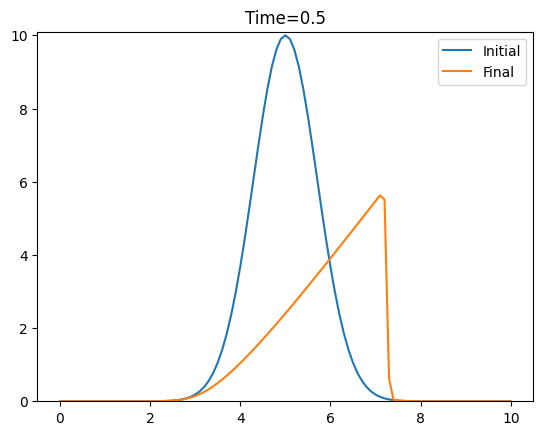

In [74]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title('Time='+str(round(t,2)))
plt.ylim(0,10.1)
plt.legend()
plt.show()

In [104]:
# set the directory where your images are stored
directory = "./Burger_images/"

# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

print(files)




['fig_00020.png', 'fig_00060.png', 'fig_00100.png', 'fig_00040.png', 'fig_00010.png', 'fig_00080.png', 'fig_00050.png', 'fig_00090.png', 'fig_00030.png', 'fig_00000.png', 'fig_00070.png'] 

['fig_00000.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png', 'fig_00090.png', 'fig_00100.png']


In [105]:
import imageio
with imageio.get_writer('./movie.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./Burger_images/'+file)
        writer.append_data(image)
        
files=[]


/tmp/ipykernel_25714/2249862637.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('./Burger_images/'+file)


# flux conservative solution

In [76]:
import matplotlib.pyplot as plt
import os
##create directory where to save images
print(os.getcwd())

os.makedirs('./Burger_flux_cons_images')

os.listdir('./')

/home/malvi/Documents/numerical relativity/numerical_rel/Advection/Burgers_equation


FileExistsError: [Errno 17] File exists: './Burger_flux_cons_images'

In [77]:
# Initialize the solution array
u_current_f = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current_f**2)/len(u_current_f)))

time=[]
time.append(0.0)

In [78]:
def f(u):
    return 1/2 * u**2

In [79]:
# Initilize time and iteration counter
t = 0.0
i = 0


#save the initial conditions
plt.plot(x, u_current_f)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.savefig('./Burger_flux_cons_images/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()



#solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next_f = u_current_f - dt/(dx)*(f(u_current_f) - f(np.roll(u_current_f, 1)) )  #if I'm not using python I need to write the boundary cond...  
    
    # Update the solution
    u_current_f = u_next_f.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current_f**2)/len(u_current_f)))
    time.append(t)
    


    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current_f)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,10.1)
        plt.savefig('./Burger_flux_cons_images/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()


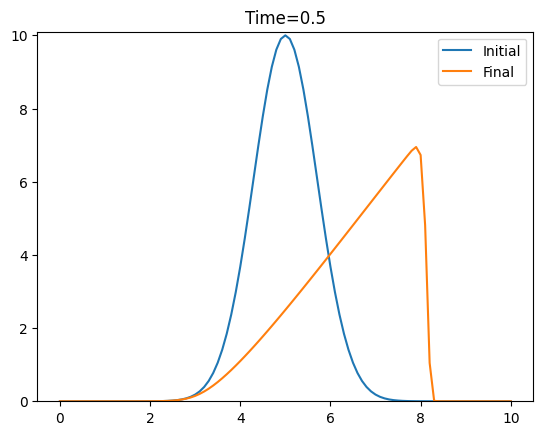

In [80]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current_f, label='Final')
plt.title('Time='+str(round(t,2)))
plt.ylim(0,10.1)
plt.legend()
plt.show()

In [40]:
# set the directory where your images are stored
directory = "./Burger_flux_cons_images/"

# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

print(files)




['fig_00020.png', 'fig_00060.png', 'fig_00100.png', 'fig_00040.png', 'fig_00010.png', 'fig_00080.png', 'fig_00050.png', 'fig_00090.png', 'fig_00030.png', 'fig_00000.png', 'fig_00070.png'] 

['fig_00000.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png', 'fig_00090.png', 'fig_00100.png']


In [41]:
import imageio
with imageio.get_writer('./movie_flux_cons.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./Burger_flux_cons_images/'+file)
        writer.append_data(image)
        
files=[]


/tmp/ipykernel_25714/398589310.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('./Burger_flux_cons_images/'+file)


# Comparison

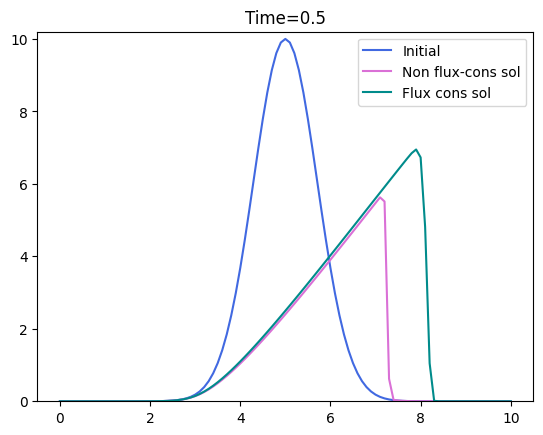

In [103]:
plt.plot(x, u_initial, label='Initial',c = "royalblue")
plt.plot(x, u_current, label='Non flux-cons sol', c = "orchid")
plt.plot(x, u_current_f, label='Flux cons sol', c = "darkcyan")
plt.title('Time='+str(round(t,2)))
plt.ylim(0,10.2)
plt.legend(loc = 'best')
plt.show()

In [31]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./movie.mp4" type="video/mp4">
</video></div>""")

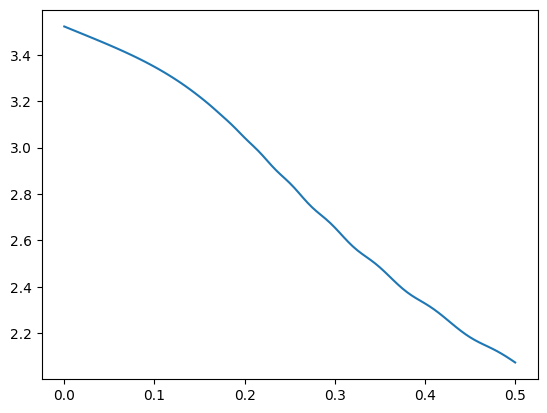

In [32]:
plt.plot(time,l2norm)
plt.show()

#Compare with data stored
l2_saved=np.genfromtxt('./l2norm_FTCS.dat', comments='#')
plt.plot(time,l2norm)
plt.plot(l2_saved[:,0], l2_saved[:,1], '+')
plt.show()